In [1]:
import json

In [2]:
%cd ~/code/textrec/

/Users/kcarnold/code/textrec


In [3]:
log_entries = [json.loads(s) for s in open('./logs/49cm8f.jsonl')]

In [4]:
replies = [ent for ent in log_entries if ent['type'] == 'backendReply']

In [5]:
len(replies)

551

In [6]:
replies[50]

{'type': 'backendReply',
 'msg': {'type': 'reply',
  'timestamp': 1533233803575,
  'result': {'predictions': [{'words': ['unpainted'], 'meta': None},
    {'words': [''], 'meta': None},
    {'words': [''], 'meta': None}],
   'request_id': 50},
  'dur': 0.038904666900634766},
 'jsTimestamp': 1533233803672,
 'kind': 'p',
 'pyTimestamp': 1533233803.683781,
 'participant_id': '49cm8f'}

In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

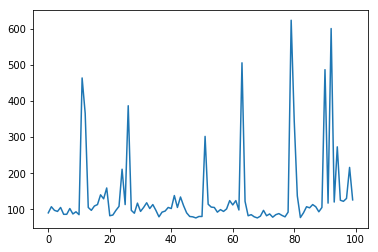

In [9]:
plt.plot([reply['jsTimestamp'] - reply['msg']['timestamp'] for reply in replies][-100:])

In [17]:
participants = []
timestamps = []
latencies = []
for participant in 'x9m97g 48mr5g h6c27m pfqcmf fcc4fp 3qjwxv 5p7cf7 xxxp65 94wwrq vg926m fjr9xf rp3jwh 46gc8v 8v9qq5 vj2c8r 7fwgf9 26f62q wxf9cx gmvv6r w3xwhj 3pcfjp 85c66x 5cgvvc ch945r 7xcppv qmchp7 62wvgm mw7pc7 63mrcq 4vmgqv 32fr2w cw8jpm 7jp5h4 f3892v p4q4jp f479h2 f8frp2 4x7jjx 7j4gc6 5pf4h7 gcjjqc xgcr52 pr5hff jh3rx5 3cm2qq 6fgx6j cf73g3 xvxq7w c2wv83 gx8vx9 hq2g7q x3mrpx vvfj4x 8vcxq6 96gq9f 7grhw7 j39263 pqf6q5 49cm8f'.split():
    log_entries = [json.loads(s) for s in open(f'./logs/{participant}.jsonl')]
    replies = [ent for ent in log_entries if ent['type'] == 'backendReply']
    for reply in replies:
        participants.append(participant)
        timestamps.append(reply['jsTimestamp'] / 1000)
        latencies.append(reply['jsTimestamp'] - reply['msg']['timestamp'])
        

In [18]:
import pandas as pd

In [19]:
df = pd.DataFrame(dict(participant=participants, timestamp=timestamps, latency=latencies))

In [25]:
df['timestamp'] = pd.to_datetime(df.timestamp, unit='s')

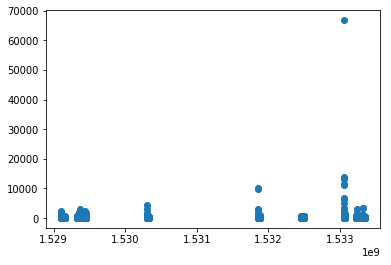

In [20]:
plt.scatter(x=timestamps, y=latencies)

In [21]:
import seaborn as sns

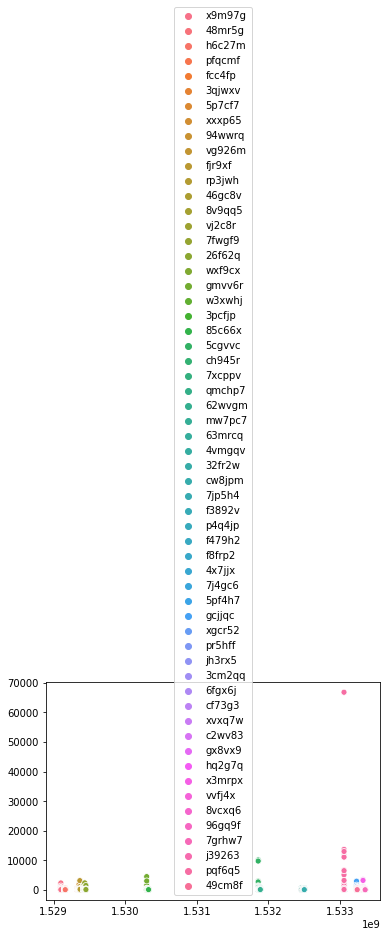

In [29]:
sns.scatterplot(x=timestamps, y=latencies, hue=participants)

In [27]:
import datetime

In [32]:
df.timestamp.max()

Timestamp('2018-08-04 02:58:28.645000')

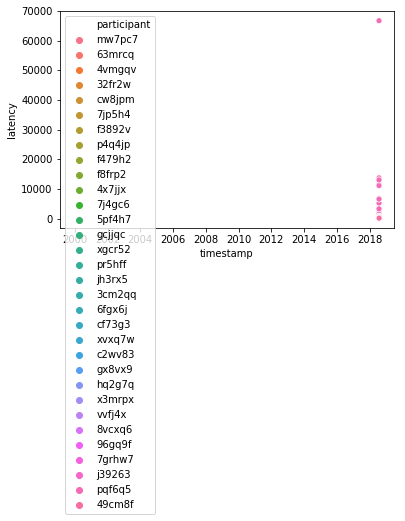

In [28]:
sns.scatterplot(x='timestamp', y='latency', hue='participant', data=df[df.timestamp > datetime.datetime(2018, 7, 20)])